# Inaugural Project

We start by importing packages and our class. The class 'HouseholdSpecializationModelClass' contains the model equations and the methods used for solving the five quesions in this assignment.

In [1]:
# Import packages 
import numpy as np
import os
import sys
import matplotlib.pyplot as plt 
from scipy import optimize

# Autoreload of our model
%load_ext autoreload
%autoreload 2

# Import class
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Question 1


To illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$, we solve the model discretely for different combinations of $\alpha$ and $\sigma$. The parameter $\alpha$ dictates the relative productivity between males and females and $\sigma$ dictates the elasticity of substitution between males and females household work.

<strong>Procedure </strong>
1. Create an instance of the householdSpecializationModel

2. Vary the $\alpha$ and $\sigma$ parameters

3. Solve the model discretely for each combination of $\alpha$ and $\sigma$

4. Print the result $\frac{H_F}{H_M}$ ratio as a list along with the corresponding $\alpha$ and $\sigma$ and a 3D plot. 

In [2]:
# Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Create an empty list
par_list = []

# Loop over each value of alpha
for a in model.par.alpha_vec:
    # Sets alpha value in the model instance
    model.par.alpha = a

    # Loop over each value of sigma
    for s in model.par.sigma_vec:
        # Sets sigma value in the model instance
        model.par.sigma = s

        # Solves the model and appends the values to the list
        par_list.append(model.solve_discrete())

# Iterates over 9 parameter values
for i in range(9):
    # Gets parameter values for the i-th iteration
    parameters = par_list[i]

    # Prints the ratio of FH and HM and the corresponding alpha and sigma values
    with np.errstate(all="ignore"): print(f' HF/HM = {parameters[2]:.2f} for alpha = {parameters[4]:.2f} and sigma = {parameters[5]:.2f}')

c:\Users\miche\OneDrive\Dokumenter\Python\projects-2023-iim-5\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


 HF/HM = 0.55 for alpha = 0.25 and sigma = 0.50
 HF/HM = 0.31 for alpha = 0.25 and sigma = 1.00
 HF/HM = 0.21 for alpha = 0.25 and sigma = 1.50
 HF/HM = 1.00 for alpha = 0.50 and sigma = 0.50
 HF/HM = 1.00 for alpha = 0.50 and sigma = 1.00
 HF/HM = 1.00 for alpha = 0.50 and sigma = 1.50
 HF/HM = 1.83 for alpha = 0.75 and sigma = 0.50
 HF/HM = 3.25 for alpha = 0.75 and sigma = 1.00
 HF/HM = 4.67 for alpha = 0.75 and sigma = 1.50


Furthermore we show the results of how $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$ in a 3D plot. 


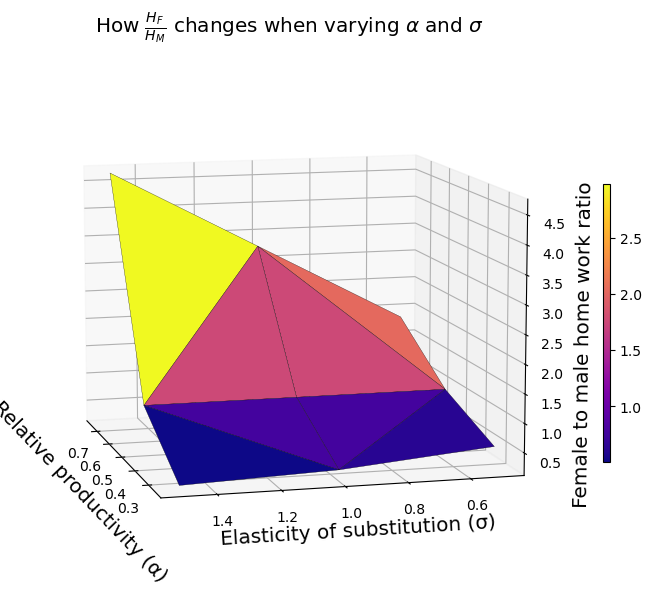

In [3]:
# We make three new loops over the sigma, HF/HM and alpha values from the list above
sigma_fig = ["{:.2f}".format(sublist[5]) for sublist in par_list]
HF_div_HM_fig = ["{:.2f}".format(sublist[2]) for sublist in par_list]
alpha_fig = ["{:.2f}".format(sublist[4]) for sublist in par_list]

# The results illustrated in a figure, using the three new lists
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
trisurf = ax.plot_trisurf(
    ['{:.2f}'.format(float(a)) for a in alpha_fig],
    [float(s) for s in sigma_fig],
    [float(h) for h in HF_div_HM_fig],
    cmap='plasma',  
    linewidth=0.2, antialiased=True, edgecolor='black'
)
fig.colorbar(trisurf, ax=ax, shrink=0.4, aspect=40)
ax.set_title(r"How $\frac{H_F}{H_M}$ changes when varying $\alpha$ and $\sigma$", size='x-large')
ax.set_xlabel('Relative productivity (\u03B1)', size='x-large')
ax.set_ylabel('Elasticity of substitution (\u03C3)', size='x-large')
ax.set_zlabel('Female to male home work ratio', size='x-large')
ax.view_init(elev=10, azim=165)
plt.show(block=False)

The results show the ratio of `HF` to `HM` for different combinations of the parameters $\alpha$ and $\sigma$. These ratios indicate the relative differences in hours worked at home by males and females for each combination of parameter values.

Increasing $\alpha$ having a fixed $\sigma$ in the household utility function, the weight of the females utility increases relative to the males. This implies that the males specializes more in market work while females specializes more in home production because females becomes more productive in the home production relative to males. As a result, HF increases while HM decreases which entails that $\frac{H_F}{H_M}$ increases.

When considering the elasticity of substitution $\sigma$ we observe, that when $\sigma$ is high, it is easier for the male to take on more house work relative to the females. Therefore, when $\alpha$ is low and $\sigma$ increases,  $\frac{H_F}{H_M}$ decreases. And vice versa, when $\alpha$ is high. When $\alpha$ is equal to 0.5, the male and female are equally productive. Therefore, they do not have incentives to allocate housework unequally no matter how easy it is to allocate the hours (which depends on $\sigma$).

# Question 2

In this section, we will plot $\log(\frac{H_F}{H_M})$ against $\log(\frac{w_F}{w_M})$ for $w_F \in [0.8, 0.9, 1.0, 1.1, 1,2]$ 

<strong>Procedure </strong>
1. Resetting $\alpha$ and $\sigma$ to its baseline values ($\alpha$ = 0.5, $\sigma$ = 1)

2. Create an empty list *par_list_2* where we iteriate over $w_F$ values, set the wage ratio, solve the model, and append the results to *par_list_2*.

3. Create a new empty list *lnHFHM_list* where we iteriate over parameter values, calculate the natural logarithm of $\frac{H_F}{H_M}$, and add it to *lnHFHM_list*.

4. Plot $\log(\frac{H_F}{H_M})$ against  $\log(\frac{w_F}{w_M})$

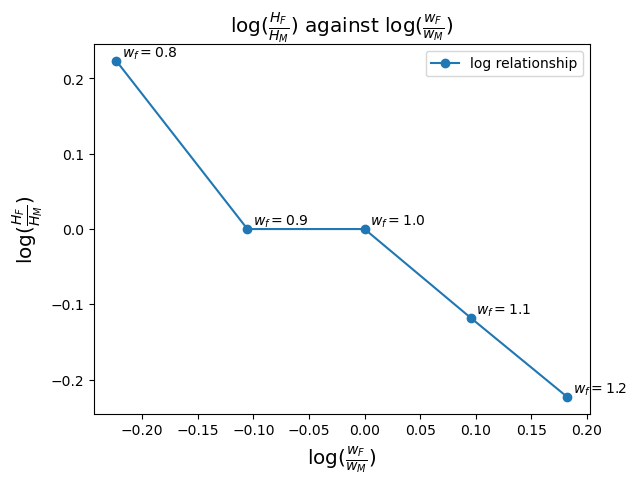

In [4]:
# Sets the value of the parameters -
model.par.alpha = 0.5
model.par.sigma = 1

# Create an empty list
par_list_2 = []

# Iterate over each value of wF
for wF in model.par.wF_vec:
    
    # Set the wage ratio of women to men 
    model.par.wF = wF

    # Solve the model 
    par_list_2.append(model.solve_discrete())

# Create an empty list
lnHFHM_list = []

# Iteriates over 5 parameter values
for i in range(5):

    # Gets parameter values for the i-th iteration
    parameters = par_list_2[i]

    # Extract the natural logarithm 
    lnHFHM = parameters[3]

    # Add the natural logarithm to ´lnHFHM_list´
    lnHFHM_list.append(lnHFHM)

# Plot log H_F/H_M against log w_F/w_M for different w_F walues
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.par.lnwFwH_vec, lnHFHM_list, label='log relationship', marker = "o")

# Create labels in the plot 
ax.set_title(r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$', size='x-large')
ax.set_xlabel(rf'$\log (\frac{{w_F}}{{w_M}})$', size='x-large')
ax.set_ylabel(rf'$\log (\frac{{H_F}}{{H_M}})$', size='x-large')
ax.legend(loc='upper right');
for x, y in zip(model.par.lnwFwH_vec, lnHFHM_list):
    ax.annotate(r'$w_f=${:.1f}'.format(np.exp(x)), xy= (x+0.005,y+0.005))

The plot shows a negative relationship between the log of the relative wage for females compared to males (x-axis) and the log of the relative hours worked from home by females compared to males (y-axis). This suggests that as the relative wage for females increases, the relative hours worked at home by females decreases. This result is expected as a relative higher wage for females will create an incentive for females to work rather than working in the household. Furthermore, we observe that when $\log (\frac{{w_F}}{{w_M}}) = 0$, the wage for males and females are equal. 

# Question 3

In this section, we will plot $\log(\frac{H_F}{H_M})$ against $\log(\frac{w_F}{w_M})$ for $w_F \in [0.8, 0.9, 1.0, 1.1, 1,2]$ assuming that the choice set is continuous, i.e. $L_M, L_F, H_M, H_F \in [0,24]$

<strong>Procedure </strong>
1. We solve the model continously for different values of $w_F$ because the choice set of time is now continous, meaning that they do not have to work in 30 minute intervals.

2. We use the solver SLSQP where we optimize the utility s.t. to the bounds and constraints given in the assignment. 

3. Finally, we plot the relative log hours working at home against log relative wages for different female wages $w_F$.

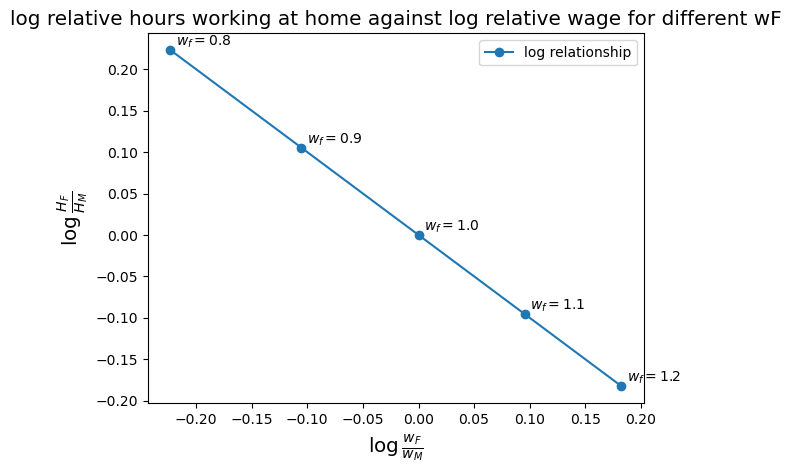

In [5]:
# # Sets the value of the parameters
model.par.alpha = 0.5
model.par.sigma = 1

# Create an empty list
lnHFHM_Q3 = []

# Iteriates over 5 parameter values
for i in range(5):

    # Gets parameter values for the i-th iteration
    model.par.wF = model.par.wF_vec[i] 

    # Add the natural logarithm to ´lnHFHM_Q3´
    lnHFHM_Q3.append(model.solve())

# Plot log H_F/H_M against log w_F/w_M for different w_F walues
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.par.lnwFwH_vec, lnHFHM_Q3,  label='log relationship', marker = "o")

# Create labels in the plot 
ax.set_title('log relative hours working at home against log relative wage for different wF', size='x-large')
ax.set_xlabel(rf'$\log \frac{{w_F}}{{w_M}}$', size='x-large')
ax.set_ylabel(rf'$\log \frac{{H_F}}{{H_M}}$', size='x-large')
ax.legend(loc='upper right'); # Activate legend (uses the labels in ax.plot())
for x, y in zip(model.par.lnwFwH_vec, lnHFHM_Q3):
    ax.annotate(r'$w_f=${:.1f}'.format(np.exp(x)), xy= (x+0.005,y+0.005))

The plot shows a negative relationship between the log of the relative wage for females compared to males (x-axis) and the log of the relative hours worked from home by females compared to males (y-axis) when the choice set is continious. This suggests that as the relative wage for females increases, the relative hours worked at home by females decreases. This result is expected as a relative higher wage for females will create an incentive for females to work rather than working in the household.

# Question 4

In this section we are estimating the values of $\alpha$ and $\sigma$ that minimizes $(\beta_0 - \hat{\beta_0})^2 + (\beta_1-\hat{\beta_1})^2$.

<strong>Procedure </strong>
1. We solves the model continously for the female wages vector. A numerical optimizer is used to minimize the equation.

2. We make a 3D plot of the function values for different combinations of $\alpha$ and $\sigma$.

In [7]:
# Define the objective function
def objective_func(par): 
    alpha, sigma = par
    model = HouseholdSpecializationModelClass()
    model.par.alpha = alpha
    model.par.sigma = sigma
    beta0_true = 0.4
    beta1_true = -0.1

    # Iterates over 5 parameter values
    for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_continous()
        model.sol.HF_vec[i] = results.HF
        model.sol.HM_vec[i] = results.HM

    # Runs a regression 
    model.run_regression()
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    # Returns the sum
    return ((beta0_true - beta0)**2 + (beta1_true - beta1)**2)

# Guess and bounds 
par_guess = [0.5, 1.0]
bounds = ((0, 1), (0, 4))

# Suppress error printing using `try-except` block
try:
    # Run optimization
    result = optimize.minimize(objective_func, par_guess, bounds=bounds, method="Nelder-Mead")
    x = (result.x[0], result.x[1])
    with np.errstate(all="ignore"): print(f'The optimal values of the parameters are alpha={result.x[0]:.3f} and sigma={result.x[1]:.3f}')
    with np.errstate(all="ignore"): print(f'The squared deviation from data moments is in this case: {objective_func(x)}')
except np.linalg.LinAlgError:
    pass

The optimal values of the parameters are alpha=0.988 and sigma=0.091
The squared deviation from data moments is in this case: 1.2269493292158662e-09


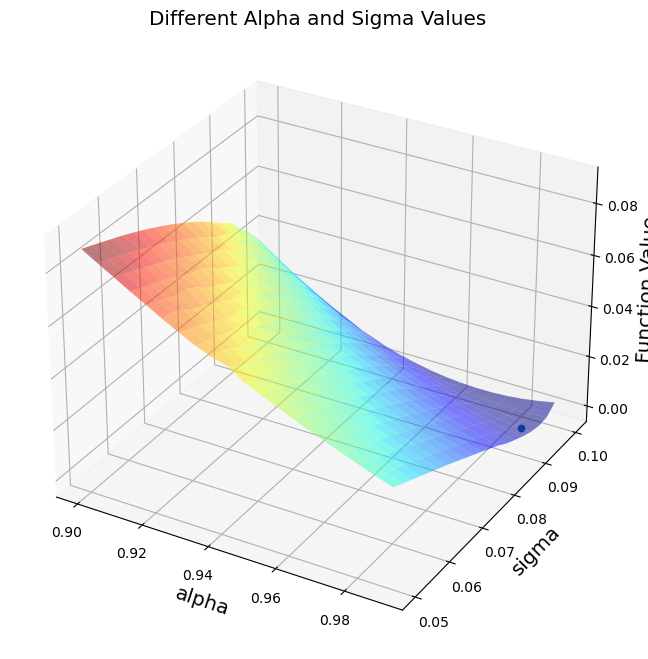

In [19]:
alphas = np.linspace(0.90,0.99,20)
sigmas = np.linspace(0.05,0.1,20)

func_vec = [] 
# Loop over alpha and sigma values 
for i, alpha in enumerate(alphas):
    for j, sigma in enumerate(sigmas):
        model = HouseholdSpecializationModelClass() 
        model.par.alpha = alpha
        model.par.sigma = sigma 
        model.solve_wF_vec() 
        model.run_regression()
        func_value = ((0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2)
        if func_value > 0:
            func_vec.append(func_value)
            
# Sets the length of the alpha and sigma vector the same as func_vec
func_vals = np.array(func_vec).reshape(len(alphas), len(sigmas)) 

# Creates grid of alpha and sigma values 
alpha_grid, sigma_grid = np.meshgrid(alphas, sigmas)

# 3D plot
fig = plt.figure(figsize=(10,8)) 

#Making the plot 3d
ax = plt.axes(projection='3d') 
ax.plot_surface(alpha_grid, sigma_grid, func_vals, cmap='jet', alpha = 0.50) 
ax.scatter([0.988], [0.091], [(0.4-model.sol.beta0)**2 + (-0.1-model.sol.beta1)**2]) 
ax.set_title('Different Alpha and Sigma Values', size='x-large') 
ax.set_xlabel(r'alpha', size='x-large') 
ax.set_ylabel(r'sigma', size='x-large') 
ax.set_zlabel('Function Value', size='x-large') 

plt.show() 

$\beta_0$ is the difference in log hours working at home for men and women. When the wage is equal for both sexes ($\frac{wF}{wM}=1$), then $\beta_0$ = $log\frac{H_F}{H_M}$ = 0.4, the women spend more hours doing work in the household compared to the men.

$\beta_1$ is how a change in the relative wages changes the ratio of hours worked at home between men and women. Siminski and Yetsenga (2022) find that $\beta_1 = -0.1$ meaning that a 1% change in the change in the relative wage (to the womans advantage) leads to only a 0.1 % decrease for hours worked at home.

For our model to fit with Siminski and Yetsenga (2022) findings we find that $\alpha = 0.988$ meaning that men are way more productive working in the market while women are most productive at home. Furthermore, $\sigma = 0.091$ meaning the elasticity of substituiton is relatively strong, so even if the women becomes more productive in market work, the rate of substitution would be relatively low.
Overall this means that men will do almost all of the work in the market while the women do almost all of the housework.

# Question 5

In this section we suggest and implement an extension of the Household Specialization Model, and analyze whether or not it can help match the data when $\alpha$ = 0.5. We multiply HM with 0.5, which makes the men spend twice as many hours at home compared to at work. 

<strong>Procedure </strong>

1. We follow same procedure as in question 3, but now we have weighted HM with 0.5 (can be seen in the model extention)

2. We plot the results from question 3 and 5 in the same graph.  

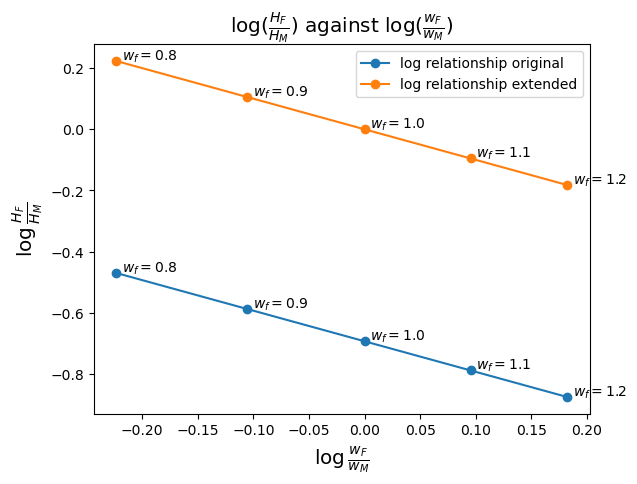

In [20]:
# # Sets the value of the parameters
model.par.alpha = 0.5
model.par.sigma = 1

# Create an empty list
lnHFHM_Q5 = []

# Iterate over 5 parameter values
for i in range(5):
    # Sets the value of the parameters
    model.par.alpha = 0.5
    model.par.sigma = 1
    model.par.wF = model.par.wF_vec[i]
    
    # Solve the model continuously and get the lnHFHM value
    opt = model.extension()
    lnHFHM = opt.lnHFHM
    lnHFHM_Q5.append(lnHFHM)

# Plot log H_F/H_M against log w_F/w_M for different w_F values
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(model.par.lnwFwH_vec, lnHFHM_Q5, label='log relationship original', marker="o")
ax.plot(model.par.lnwFwH_vec, lnHFHM_Q3, label='log relationship extended', marker="o")

# Create labels in the plot
ax.set_title(r'$\log(\frac{H_F}{H_M})$ against $\log(\frac{w_F}{w_M})$', size='x-large')
ax.set_xlabel(rf'$\log \frac{{w_F}}{{w_M}}$', size='x-large')
ax.set_ylabel(rf'$\log \frac{{H_F}}{{H_M}}$', size='x-large')
ax.legend(loc='upper right')

# Add labels to the points in the plot for lnHFHM_Q3
for x, y in zip(model.par.lnwFwH_vec, lnHFHM_Q3):
    ax.annotate(r'$w_f=${:.1f}'.format(np.exp(x)), xy=(x + 0.005, y + 0.005))

# Add labels to the points in the plot for lnHFHM_Q5
for x, y in zip(model.par.lnwFwH_vec, lnHFHM_Q5):
    ax.annotate(r'$w_f=${:.1f}'.format(np.exp(x)), xy=(x + 0.005, y + 0.005))

plt.show()

The new plot from the extented model shows the same negative relationship between the log of the relative wage for females compared to males (x-axis) and the log of the relative hours worked from home by females compared to males (y-axis) when the choice set is continious. Furthermore, we see, that the slopes for both graphs are the same. Only the hours of work are affected and not wages.
The only effect we see is that the ratio of hours worked by women relative to men becomes greater, meaning that the women work more outside of the home than the men compared to the origianl model.

# Conclusion

In this assignment, we have explored various aspects of the 'HouseholdSpecializationModel':

In **question 1**, we investigated how $\frac{H_F}{H_M}$ changes when varying the parameter $\alpha$ for a fixed $\sigma$. A higher level of $\alpha$ implies a higher weight of the female´s utility relative to the male´s utility of work at home. Additionally, we find that a higher value of the elasticity of substitution $\sigma$, makes it easier for the male to take on a larger share of the housework compared to the females.

Moving on to **question 2**, we plot $\log(\frac{H_F}{H_M})$ against $\log(\frac{w_F}{w_M})$ for different values of $w_F$. The plot reveals a negative relationship between these variables, indicating that as the relative wage for females decreases, the relative hours worked from home by females increases. We notice that when $\log (\frac{{w_F}}{{w_M}}) = 0$, the wage for males and females are equal. 

In **question 3**, we consider the same plot as in question 2 but assuming a continous choice set, where the hours worked by males and females can vary from 0 to 24. We observe again a negative correlation between the log of the relative wage for females compared to males and the log of the relative hours worked from home by females compared to males.

In **question 4**, we estimate the values of $\alpha$ and $\sigma$ that minimizes $(\beta_0 - \hat{\beta_0})^2 + (\beta_1-\hat{\beta_1})^2$. Our estimations reveal an optimal value of $\alpha=0.988$, suggesting that men are more productive in working outside home, while women are most productive at home. Additionally, we find a value of $\sigma=0.091$, indicating a relatively strong elasticity of substituiton.

Finally, in **question 5**, we extend the 'HouseholdSpecializationModel'. The new plot shows the same negative relationship between the log of the relative wage for females compared to males and the log of the relative hours worked from home by females compared to males but now the ratio of hours worked by women relative to men becomes greater than before we make the extention of the model. 